In [1]:
#this data is used for the correlation of the data
import pandas as pd
import numpy as np
carDf = pd.read_csv("/home/tulug/Desktop/CS552HW2/car-pricing-data.csv")
#Removing the null values from dataframe
carDf.dropna(inplace=True) # inplace=True
carDf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [4]:
carDf['mileage'] = carDf['mileage'].map(lambda x: x.lstrip('+-').rstrip('kmpl'))
carDf['engine'] = carDf['engine'].map(lambda x: x.lstrip('+-').rstrip('CC'))
carDf['max_power'] = carDf['max_power'].map(lambda x: x.lstrip('+-').rstrip('bhp'))
carDf['mileage'] = carDf['mileage'].map(lambda x: x.lstrip('+-').rstrip('km/kg'))
carDf["year"] = 2021 - carDf["year"]
carDf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,8,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0
8125,Maruti Swift Dzire ZDi,12,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0
8126,Tata Indigo CR4,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


In [5]:
encoded_data = pd.get_dummies(carDf, columns = ['name', 'fuel','owner','transmission','seller_type'])

In [6]:
encoded_data

,year,selling_price,km_driven,mileage,engine,max_power,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,7,450000,145500,23.4,1248,74,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,7,370000,120000,21.14,1498,103.52,5.0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,15,158000,140000,17.7,1497,78,5.0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,11,225000,127000,23.0,1396,90,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,14,130000,120000,16.1,1298,88.2,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8,320000,110000,18.5,1197,82.85,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
8124,14,135000,119000,16.8,1493,110,5.0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
8125,12,382000,120000,19.3,1248,73.9,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
8126,8,290000,25000,23.57,1396,70,5.0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [7]:
#correlation of data
cor=encoded_data.corr(method="pearson")
cor

,year,selling_price,km_driven,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,name_Ashok Leyland Stile LE,name_Audi A3 35 TDI Premium Plus,...,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
year,1.000000,-0.412268,0.428434,0.009144,0.040671,0.058124,0.017401,0.017401,0.002857,-0.014472,...,-0.492103,0.205395,0.317789,-0.032646,0.270972,-0.248972,0.248972,-0.214529,0.243731,-0.100382
selling_price,-0.412268,1.000000,-0.222196,0.041358,-0.007946,-0.007614,-0.007296,-0.006218,-0.004835,0.042043,...,0.239936,-0.073586,-0.178898,0.116080,-0.115086,0.590279,-0.590279,0.401822,-0.386174,0.032794
km_driven,0.428434,-0.222196,1.000000,0.227336,0.004121,0.006101,-0.001821,0.002140,0.025907,-0.006776,...,-0.295524,0.089233,0.209988,-0.024169,0.148774,-0.201207,0.201207,-0.178748,0.202875,-0.083191
seats,0.009144,0.041358,0.227336,1.000000,-0.004884,-0.004884,-0.004884,-0.004884,0.030279,-0.006908,...,-0.035935,0.007793,0.034312,-0.010925,0.005083,-0.072821,0.072821,-0.074188,0.081313,-0.028152
name_Ambassador CLASSIC 1500 DSL AC,0.040671,-0.007946,0.004121,-0.004884,1.000000,-0.000126,-0.000126,-0.000126,-0.000126,-0.000179,...,-0.015653,-0.001616,0.019219,-0.000283,-0.002953,-0.004379,0.004379,-0.004538,0.005087,-0.001973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transmission_Automatic,-0.248972,0.590279,-0.201207,-0.072821,-0.004379,-0.004379,-0.004379,-0.004379,-0.004379,0.040850,...,0.158988,-0.040020,-0.122317,0.049722,-0.071788,1.000000,-1.000000,0.336604,-0.378712,0.149317
transmission_Manual,0.248972,-0.590279,0.201207,0.072821,0.004379,0.004379,0.004379,0.004379,0.004379,-0.040850,...,-0.158988,0.040020,0.122317,-0.049722,0.071788,-1.000000,1.000000,-0.336604,0.378712,-0.149317
seller_type_Dealer,-0.214529,0.401822,-0.178748,-0.074188,-0.004538,-0.004538,-0.004538,-0.004538,-0.004538,-0.006418,...,0.212202,-0.057985,-0.159186,0.062344,-0.100009,0.336604,-0.336604,1.000000,-0.892002,-0.070770
seller_type_Individual,0.243731,-0.386174,0.202875,0.081313,0.005087,0.005087,0.005087,0.005087,0.005087,0.007195,...,-0.229743,0.065005,0.168117,-0.055611,0.113287,-0.378712,0.378712,-0.892002,1.000000,-0.387772


In [8]:
#the data is shaped according to the 0.4
temp=cor[(cor["selling_price"]<=-0.4) |(cor["selling_price"]>=0.4)].index
temp

Index(['year', 'selling_price', 'name_BMW X4 M Sport X xDrive20d',
       'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer'],
      dtype='object')

In [9]:
#dividing the data between dependent and independent variables
Y = encoded_data.selling_price
X=encoded_data[temp] 
X.drop("selling_price",axis=1,inplace=True)
X


/home/tulug/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year,name_BMW X4 M Sport X xDrive20d,transmission_Automatic,transmission_Manual,seller_type_Dealer
0,7,0,0,1,0
1,7,0,0,1,0
2,15,0,0,1,0
3,11,0,0,1,0
4,14,0,0,1,0
...,...,...,...,...,...
8123,8,0,0,1,0
8124,14,0,0,1,0
8125,12,0,0,1,0
8126,8,0,0,1,0


In [10]:
#dividing the data between train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=147)

In [11]:
#scaling the data 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) 
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_train

array([[0.26923077, 0.        , 0.        , 1.        , 0.        ],
       [0.26923077, 0.        , 0.        , 1.        , 1.        ],
       [0.11538462, 0.        , 0.        , 1.        , 0.        ],
       ...,
       [0.46153846, 0.        , 0.        , 1.        , 0.        ],
       [0.19230769, 0.        , 0.        , 1.        , 0.        ],
       [0.34615385, 0.        , 0.        , 1.        , 0.        ]])

In [12]:
#linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(scaled_x_train,y_train)
LinearRegression()

LinearRegression()

In [13]:
#model coefficient
model.coef_

array([-1348431.30390402,  3475426.93637312,   476490.67432234,
        -476490.67432233,   326793.37888961])

In [14]:
#model intercept
model.intercept_

1240543.0572205973

In [15]:
#creation of formula
_str="y="

for i, m in enumerate(model.coef_):
    _str+="x_{}*{}+".format(i,m)
_str+=str(model.intercept_)
print(_str)

y=x_0*-1348431.3039040184+x_1*3475426.936373117+x_2*476490.67432234285+x_3*-476490.6743223317+x_4*326793.37888961495+1240543.0572205973


In [16]:
#transforming data range between 0 and 1
scaled_x_test=scaler.fit_transform(x_test)

In [17]:
#prediction of y
y_predict=model.predict(scaled_x_test) #

In [18]:
y_predict[len(y_predict)-1]

297287.7007776438

In [19]:

for i in range(len(y_predict)):
    print("Predicted value:", y_predict[i]," Actual value:",y_test.values[i])

Predicted value: 624081.0796672588  Actual value: 500000
Predicted value: -13888.753969437443  Actual value: 65000
Predicted value: 245424.95831979695  Actual value: 270000
Predicted value: 401013.1856933376  Actual value: 500000
Predicted value: 504738.67060903134  Actual value: 780000
Predicted value: 349150.4432354907  Actual value: 340000
Predicted value: 452875.92815118446  Actual value: 320000
Predicted value: 608464.1555247251  Actual value: 900000
Predicted value: 401013.1856933376  Actual value: 300000
Predicted value: 1991964.3679747083  Actual value: 4500000
Predicted value: 504738.67060903134  Actual value: 700000
Predicted value: 1613308.2466272465  Actual value: 1150000
Predicted value: 831532.0494986463  Actual value: 484999
Predicted value: 660326.8979825719  Actual value: 600000
Predicted value: 660326.8979825719  Actual value: 630000
Predicted value: 935257.53441434  Actual value: 450000
Predicted value: 401013.1856933376  Actual value: 400000
Predicted value: 245424.

Predicted value: 556601.4130668782  Actual value: 425000
Predicted value: 89836.73094625631  Actual value: 404000
Predicted value: 1457720.0192537059  Actual value: 2000000
Predicted value: 608464.1555247251  Actual value: 1100000
Predicted value: 556601.4130668782  Actual value: 475000
Predicted value: 297287.7007776438  Actual value: 240000
Predicted value: 37973.988488409435  Actual value: 282000
Predicted value: 297287.7007776438  Actual value: 220000
Predicted value: 608464.1555247251  Actual value: 700000
Predicted value: 452875.92815118446  Actual value: 640000
Predicted value: 504738.67060903134  Actual value: 550000
Predicted value: 349150.4432354907  Actual value: 150000
Predicted value: 89836.73094625631  Actual value: 150000
Predicted value: 608464.1555247251  Actual value: 310000
Predicted value: 297287.7007776438  Actual value: 370000
Predicted value: 660326.8979825719  Actual value: 800000
Predicted value: 1613308.2466272465  Actual value: 645000
Predicted value: -273202

In [ ]:
#printin the formula
_str="y="

for i, m in enumerate(model.coef_):
    _str+="x_{}*{}+".format(i,m)
_str+=str(model.intercept_)


print(_str)

In [25]:
#mean squared error calculation
MSE = np.square(np.subtract(y_test,y_predict)).mean()
MSE

215231732871.62463

In [26]:
#mean absolute error calculation
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

271785.55200585164

In [27]:
#Root-mean-squared error calculation
import math
RMSE = math.sqrt(MSE)
RMSE

463930.74145999923

In [20]:
#calculation of score
model.score(scaled_x_train,y_train)

0.5692634190927124

In [28]:
#f2 score calculation
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6607411438970259

In [30]:
#converting the y_test data to numpy
df_y_test = y_test.to_numpy()
df_y_test

array([ 500000,   65000,  270000, ..., 2475000,  450000,  390000])

In [31]:
#calculating of difference
difference = np.subtract(df_y_test,y_predict)
difference

array([-124081.07966726,   78888.75396944,   24575.0416802 , ...,
        534898.37448314, -277806.56458295,   92712.29922236])

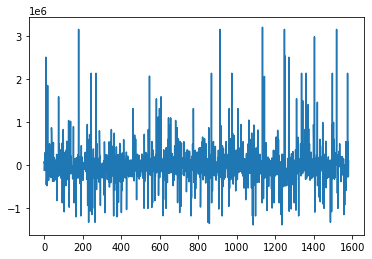

In [32]:
#visualiziation of difference
import matplotlib.pyplot as plt
plt.plot(difference)
plt.show()

In [34]:
y_test.shape
score=model.score(scaled_x_test, y_test)
score

0.6607411438970259

In [39]:
#implememting ramdomforestregressor
from sklearn.ensemble import RandomForestRegressor
myforest=RandomForestRegressor(n_estimators=100, random_state=0)
myforest.fit(scaled_x_train,y_train)

RandomForestRegressor(random_state=0)

In [40]:
myforest.predict(scaled_x_test)


array([ 293519.5640579 ,  122194.15137165,  248162.75157717, ...,
       2020639.70835949,  493618.28542692,  294745.35035957])

In [54]:
#calculating of model coefficient
myforest?


In [41]:
#calculation of score
score=myforest.score(scaled_x_test, y_test)
score

0.7164282367885768

In [42]:
#calculation of prediction
y_predict_forest=myforest.predict(scaled_x_test)

In [43]:
#print the predicted and actual values of the data in the test set

for i in range(len(y_predict)):
    print("Predicted value:", y_predict_forest[i]," Actual value:",y_test.values[i])

Predicted value: 293519.5640579028  Actual value: 500000
Predicted value: 122194.15137165479  Actual value: 65000
Predicted value: 248162.75157716882  Actual value: 270000
Predicted value: 393765.2003423279  Actual value: 500000
Predicted value: 565646.3465668312  Actual value: 780000
Predicted value: 325523.13258506265  Actual value: 340000
Predicted value: 461627.8576215894  Actual value: 320000
Predicted value: 626601.2255921359  Actual value: 900000
Predicted value: 393765.2003423279  Actual value: 300000
Predicted value: 4232084.372887236  Actual value: 4500000
Predicted value: 565646.3465668312  Actual value: 700000
Predicted value: 1320618.2630537688  Actual value: 1150000
Predicted value: 562244.5969858553  Actual value: 484999
Predicted value: 732869.8085149658  Actual value: 600000
Predicted value: 732869.8085149658  Actual value: 630000
Predicted value: 714256.1104178053  Actual value: 450000
Predicted value: 393765.2003423279  Actual value: 400000
Predicted value: 248162.75

Predicted value: 1335651.0786322323  Actual value: 3800000
Predicted value: 392584.3757587304  Actual value: 415000
Predicted value: 626601.2255921359  Actual value: 850000
Predicted value: 565646.3465668312  Actual value: 715000
Predicted value: 2629045.4117597057  Actual value: 2625000
Predicted value: 57203.42629592629  Actual value: 68000
Predicted value: 565646.3465668312  Actual value: 600000
Predicted value: 293519.5640579028  Actual value: 175000
Predicted value: 546645.2259927164  Actual value: 300000
Predicted value: 493618.2854269202  Actual value: 550000
Predicted value: 566935.7894721405  Actual value: 500000
Predicted value: 626601.2255921359  Actual value: 650000
Predicted value: 43850.0  Actual value: 99000
Predicted value: 1577801.2575003416  Actual value: 1290000
Predicted value: 171024.17195620266  Actual value: 100000
Predicted value: 546645.2259927164  Actual value: 420000
Predicted value: 732869.8085149658  Actual value: 950000
Predicted value: 5466801.91464626  A

In [44]:
#calculating of difference
difference = np.subtract(df_y_test,y_predict_forest)
difference

array([206480.4359421 , -57194.15137165,  21837.24842283, ...,
       454360.29164051, -43618.28542692,  95254.64964043])

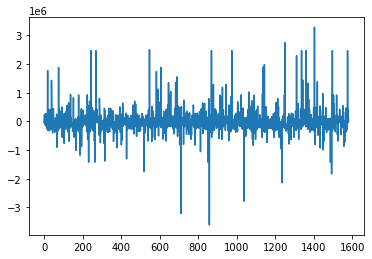

In [45]:
#visualization of difference
plt.plot(difference)
plt.show()

In [46]:
#calculation of mean squared error
MSE = np.square(np.subtract(y_test,y_predict_forest)).mean()
MSE

179902870305.4146

In [47]:
#calculation of mean absolute error
mean_absolute_error(y_test, y_predict_forest)

233519.05665788436

In [48]:
#Root-mean-squared error
RMSE = math.sqrt(MSE)
RMSE

424149.5848228719

In [49]:
#calculation of r2 score
r2_score(y_test, y_predict_forest)

0.7164282367885768

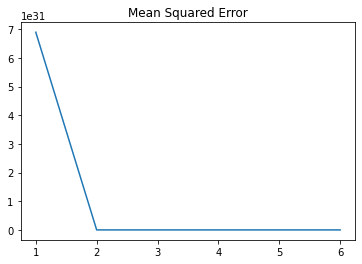

In [78]:
y = [6.893523388663361e+31,310093442609.11957,359565940366.4678,399266862319.1518,215231732871.62463,179902870305.4146]

x=[1,2,3,4,5,6]
plt.title('Mean Squared Error')
plt.plot(x, y)
# function to show the plot
plt.show()


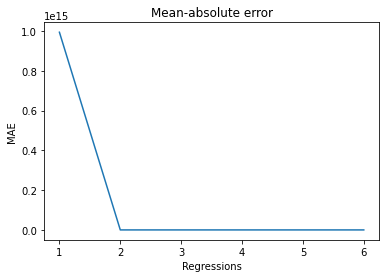

In [76]:
y = [993276743210525.6,276524.0135090737,444339.24175324745,383071.9486359539,271785.55200585164,271785.55200585164]
x=[1,2,3,4,5,6]
plt.plot(x,y)
plt.xlabel('Regressions')
plt.ylabel('MAE')
plt.title("Mean-absolute error")
plt.show()

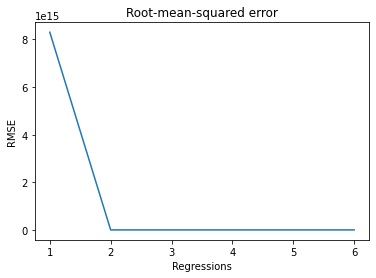

In [80]:
y=[8302724485771739.0,556860.343900621,599638.1745406706,631875.6699851259,463930.74145999923,424149.5848228719]
x=[1,2,3,4,5,6]
plt.plot(x,y)
plt.xlabel('Regressions')
plt.ylabel('RMSE')
plt.title("Root-mean-squared error")
plt.show()

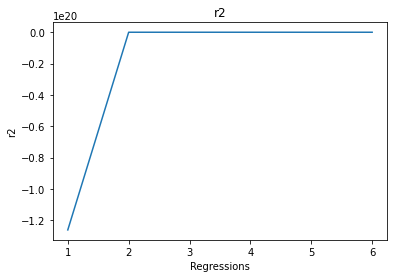

In [81]:
y=[-1.2624132971257396e+20,0.43212481741190656,0.34152566297426623,0.26882122874598546,0.5692634190927124,0.7164282367885768]
x=[1,2,3,4,5,6]
plt.plot(x,y)
plt.xlabel('Regressions')
plt.ylabel('r2')
plt.title("r2")
plt.show()